In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
get_ipython().run_line_magic('matplotlib', 'inline')
import warnings
warnings.filterwarnings('ignore')
from pmdarima.arima import auto_arima

In [4]:
data = pd.read_csv("India_confirmed_23_5_21 - Sheet1(1).csv")

In [5]:
data.head()


,Date,Cases
0,1/23/20,0
1,1/24/20,0
2,1/25/20,0
3,1/26/20,0
4,1/27/20,0


In [6]:
data.tail()

,Date,Cases
482,5/19/21,276110
483,5/20/21,259551
484,5/21/21,257299
485,5/22/21,240842
486,5/23/21,222315


In [7]:
data.dtypes

Date     object
Cases     int64
dtype: object

In [8]:
data['Date']=pd.to_datetime(data['Date'])

In [9]:
data.dtypes

Date     datetime64[ns]
Cases             int64
dtype: object

In [10]:
data.set_index('Date',inplace=True)

In [11]:
data.head()

,Cases
Date,
2020-01-23,0
2020-01-24,0
2020-01-25,0
2020-01-26,0
2020-01-27,0


<AxesSubplot:xlabel='Date'>

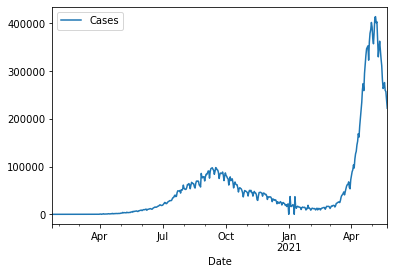

In [12]:
data.plot()

In [13]:
from pmdarima.arima import ADFTest
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(data)

(0.01, False)

In [14]:
train = data[:450]
test = data[-37:]

In [15]:
train.tail()

,Cases
Date,
2021-04-12,161736
2021-04-13,184372
2021-04-14,200739
2021-04-15,217353
2021-04-16,234692


In [16]:
test.head(87)


,Cases
Date,
2021-04-17,261394
2021-04-18,273802
2021-04-19,259167
2021-04-20,295158
2021-04-21,314644
2021-04-22,332921
2021-04-23,346786
2021-04-24,349691
2021-04-25,352991


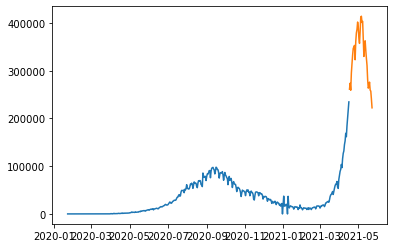

In [17]:
plt.plot(train)
plt.plot(test)

In [21]:
arima_model =  auto_arima(train,start_p=0, d=1, start_q=0, 
                          max_p=5, max_d=5, max_q=5, start_P=0, 
                          D=1, start_Q=0, max_P=5, max_D=5,
                          max_Q=5, m=12, seasonal=True, 
                          error_action='warn',trace = True,
                          supress_warnings=True,stepwise = True,
                          random_state=20,n_fits = 50 )



Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=9080.017, Time=0.13 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=8921.332, Time=0.73 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=inf, Time=1.22 sec
 ARIMA(1,1,0)(0,1,0)[12]             : AIC=9061.306, Time=0.08 sec
 ARIMA(1,1,0)(2,1,0)[12]             : AIC=8888.598, Time=0.90 sec
 ARIMA(1,1,0)(3,1,0)[12]             : AIC=8874.328, Time=1.59 sec
 ARIMA(1,1,0)(4,1,0)[12]             : AIC=8870.543, Time=2.91 sec
 ARIMA(1,1,0)(5,1,0)[12]             : AIC=8872.180, Time=4.56 sec
 ARIMA(1,1,0)(4,1,1)[12]             : AIC=8785.898, Time=15.25 sec
 ARIMA(1,1,0)(3,1,1)[12]             : AIC=8867.502, Time=4.33 sec
 ARIMA(1,1,0)(5,1,1)[12]             : AIC=8794.324, Time=33.17 sec
 ARIMA(1,1,0)(4,1,2)[12]             : AIC=8867.605, Time=7.53 sec
 ARIMA(1,1,0)(3,1,2)[12]             : AIC=inf, Time=10.93 sec
 ARIMA(1,1,0)(5,1,2)[12]             : AIC=inf, Time=19.26 sec
 ARIMA(0,1,0)(4,1,1)[12]      

In [22]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                        SARIMAX Results                                        
===============================================================================================
Dep. Variable:                                       y   No. Observations:                  450
Model:             SARIMAX(1, 1, 0)x(5, 1, [1, 2], 12)   Log Likelihood               -4380.116
Date:                                 Mon, 14 Jun 2021   AIC                           8780.232
Time:                                         16:03:25   BIC                           8821.031
Sample:                                              0   HQIC                          8796.332
                                                 - 450                                         
Covariance Type:                                   opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept    -20.0981    893.478     -0.022      0.982   -1771.282    1731.086
ar.L1         -0.1965      0.025     -7.826      0.000      -0.246      -0.147
ar.S.L12      -2.2519      0.167    -13.452      0.000      -2.580      -1.924
ar.S.L24      -2.5539      0.278     -9.182      0.000      -3.099      -2.009
ar.S.L36      -1.7918      0.260     -6.902      0.000      -2.301      -1.283
ar.S.L48      -0.8631      0.198     -4.368      0.000      -1.250      -0.476
ar.S.L60      -0.1555      0.093     -1.674      0.094      -0.338       0.027
ma.S.L12       1.3884      0.166      8.364      0.000       1.063       1.714
ma.S.L24       0.7709      0.131      5.888      0.000       0.514       1.028
sigma2      2.896e+07      0.366    7.9e+07      0.000     2.9e+07     2.9e+07
===================================================================================
Ljung-Box (L1) (Q):                   0.08   Jarque-Bera (JB):               865.12
Prob(Q):                              0.77   Prob(JB):                         0.00
Heteroskedasticity (H):             176.25   Skew:                             1.00
Prob(H) (two-sided):                  0.00   Kurtosis:                         9.59
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.28e+22. Standard errors may be unstable.
"""

In [23]:
prediction= pd.DataFrame(arima_model.predict(n_periods = 37),index=test.index)
prediction.columns = ['predicted_sales']
prediction


,predicted_sales
Date,
2021-04-17,234211.373540
2021-04-18,237916.633990
2021-04-19,240554.538246
2021-04-20,242875.735277
2021-04-21,247783.195577
2021-04-22,248688.383164
2021-04-23,248641.434923
2021-04-24,254520.662845
2021-04-25,259467.430701


ValueError: Unrecognized location 'Left corner'. Valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center


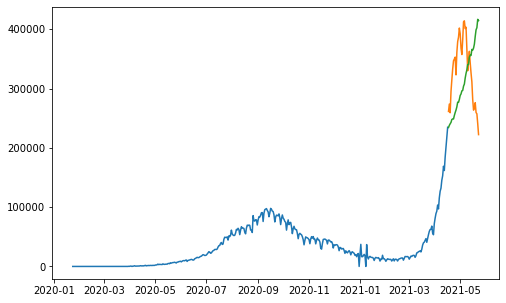

In [24]:
plt.figure(figsize=(8,5))
plt.plot(train,label="Training")
plt.plot(test,label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'Left corner')
plt.show()


In [25]:
from sklearn.metrics import mean_squared_error
from math import sqrt
test['predicted_sales'] = prediction
mse = mean_squared_error(test['Cases'], test['predicted_sales'])
rmse = sqrt(mse)
print(rmse)
   

91979.38490095109
